In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import dotenv_values, find_dotenv
import datetime as dt
import preparecorrelations as pc
# pd.set_option('display.max_columns', None)
import regressions as reg
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
import importlib
importlib.reload(pc)
importlib.reload(reg)

<module 'regressions' from 'c:\\Users\\fuem\\Documents\\correlationmodule\\regressions.py'>

# set parameters and paths, import data

In [3]:
# this looks for your configuration file and then reads it as a dictionary
config = dotenv_values(find_dotenv())

# set path using the dictionary key for which one you want
correlationpath = os.path.abspath(config["CORRELATIONDATA"]) + '\\'
cleandatapath = os.path.abspath(config["CLEANDATA"]) + '\\'
rawdatapath = os.path.abspath(config["RAWDATA"]) + '\\'
ocadatapath = os.path.abspath(config["FRANKELROSEDATA"]) + '\\'
gravitydatapath = os.path.abspath(config["GRAVITYDATA"]) + '\\'

In [4]:
# import haver data
xlsx = pd.ExcelFile(correlationpath + "gdp_consumption_haver_final.xlsx")
# haver real gdp
rgdp = pd.read_excel(xlsx, 'Real GDP')
rgdp.name = "Real GDP"
# haver real consumption
rc = pd.read_excel(xlsx, 'Real C')
rc.name = "Real Consumption"

# oecd employment
oecdemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LREM64TT.STSA.Q/OECD")
# oecd unemployment
oecdunemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LRUN64TT.STSA.Q/OECD")

# imf industrial production index
imfipi = pc.get_from_imf('CompactData/IFS/Q..AIP_SA_IX')

In [5]:
# the developed countries included in the gdp/consumption series
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", 
                  "Italy", "Japan", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", 
                  "Turkey", "U.K.", "U.S."] 

# the EMEs included in the gdp/consumption series
MSCI_EM_countries = ["Brazil", "Chile", "China", "Colombia", "Czech Republic", "Egypt", "Greece", "Hungary", "India", 
                     "Indonesia", "South Korea", "Kuwait", "Malaysia", "Mexico", "Peru", "Philippines", "Poland", "Qatar", 
                     "Saudi Arabia", "South Africa", "Taiwan", "Thailand", "Turkey", "United Arab Emirates"]

# some countries we wanted to remove from the GDP/consumption series for not having enough data (decided previously)
to_remove = ['Egypt', 'Saudi Arabia', 'Malaysia', 'Colombia', 'Qatar', 'Kuwait', 'China']

# the countries that will be used for the gdp/consumption stuff
original_countries = list(set(oecd_countries + MSCI_EM_countries) - set(to_remove))

# countries from richmond paper figures
allrichmondcountries = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'IND', 'IDN', 'IRL', 'ITA', 'JPN', 'KWT', 'MYS', 'MEX', 'NLD', 
                        'NZL', 'NOR', 'PHL', 'POL', 'PRT', 'KOR', 'SAU', 'SGP', 'ZAF', 'ESP', 'SWE', 'CHE', 'THA', 'TUR', 'ARE', 'GBR', 'USA']

# countries from frankel and rose paper
frankelrosecountries = ['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'JPN', 'NOR', 'NLD', 'NZL', 'PRT', 'ESP', 'SWE', 'CHE', 'GBR', 'USA']

# correlations demo: various data and detrending techniques

In [6]:
#  get all the haver data

# correlation coefficients
correlationdata = [rgdp, rc]
# detrending techniques
detrending = ['fourth difference', 'HP Filter', 'quadratic detrending']
# use quadratic and fourth differences instead

correlationdata_dict = {}

for data in correlationdata:
    for method in detrending:
        data_sa = pc.SeasonalAdjustment(pc.fixCols(data, original_countries))
        data_detrended = pc.Prepare_Correlations(data_sa, detrending=method).detrend(start_date="1998-01-01", end_date="2021-12-31")
        data_reshaped = data_detrended.get_organized()

        correlationdata_dict[data.name + ', ' + method] = data_reshaped
        correlationdata_dict[data.name + ', ' + method].name = data.name + ', ' + method

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.3 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 NOTE: Unable to test LS2008.4 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other reg

In [7]:
original_countries_iso3 = list(data_detrended.data.columns)

## OECD data: employment rate, first differences

In [8]:
# show the detrended data

oecdemploymentdetrend = pc.Prepare_Correlations(oecdemployment, detrending="first difference", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

oecdemploymentdetrend.data.tail()

,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,GBR,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.020503,-0.002158,-0.007761,0.024750,0.006314,0.007662,0.006535,0.006572,0.004509,0.005343,-0.004609,-0.031442,0.005114,0.005268,0.003984,0.004646,0.005792,0.005907,0.011974,0.002928,0.022163
2021-01-01,0.010624,-0.005550,-0.005444,-0.000923,-0.015866,-0.001915,-0.004750,0.002124,0.004210,0.004572,0.001228,-0.001596,-0.006199,-0.011254,0.003220,0.002399,0.003801,0.007751,-0.004738,-0.002946,0.007573
2021-04-01,0.010976,0.008960,0.022152,0.006443,-0.006855,0.009305,0.022095,0.021085,0.015886,0.008791,0.004655,0.063860,0.045954,0.022085,0.000874,0.005199,0.014655,0.009879,0.020991,0.011805,0.007622
2021-07-01,-0.004722,0.015657,0.017938,0.018633,0.012557,0.012854,-0.001093,0.013857,-0.000609,0.006593,0.004214,0.028315,0.034523,0.015428,0.002694,0.007243,0.012122,0.015087,0.011396,0.004151,0.012293
2021-10-01,0.006843,0.004520,-0.003100,0.014749,0.008898,0.002737,0.013599,0.007882,0.009706,0.002545,0.001778,0.007707,0.013558,0.009893,-0.000894,0.005305,0.006163,0.002519,0.001087,0.005971,0.011095


In [9]:
# show the correlation matrix

oecdemploymentmatrix = oecdemploymentdetrend.get_correlationmatrix()

oecdemploymentmatrix

,USA,CAN,AUS,IRL,ESP,AUT,GRC,FIN,ITA,JPN,FRA,CHE,PRT,SWE,NOR,BEL,DNK,NLD,GBR,DEU,NZL
USA,1.000000,0.953466,0.868378,0.760430,0.710771,0.649732,0.644189,0.603747,0.592090,0.529867,0.522218,0.502554,0.473778,0.472544,0.428591,0.277033,0.255687,0.231323,0.203704,0.198933,0.160140
CAN,0.953466,1.000000,0.839725,0.712975,0.667153,0.676427,0.693018,0.556342,0.568958,0.420615,0.467312,0.528502,0.425278,0.414706,0.354502,0.272348,0.200951,0.201092,0.076306,0.256708,0.099451
AUS,0.868378,0.839725,1.000000,0.640893,0.671981,0.582510,0.557024,0.620462,0.514692,0.471841,0.528107,0.374291,0.445533,0.453895,0.415307,0.280116,0.212380,0.199631,0.147945,0.211695,0.153707
IRL,0.760430,0.712975,0.640893,1.000000,0.821544,0.592513,0.654826,0.642472,0.682423,0.525048,0.629057,0.428912,0.629578,0.647781,0.559506,0.381847,0.467121,0.175722,0.387845,0.393884,0.378924
ESP,0.710771,0.667153,0.671981,0.821544,1.000000,0.533351,0.713699,0.624770,0.747326,0.525224,0.637473,0.444640,0.726294,0.586340,0.411414,0.341414,0.496623,0.093657,0.349642,0.378359,0.357435
AUT,0.649732,0.676427,0.582510,0.592513,0.533351,1.000000,0.585662,0.480197,0.317003,0.347491,0.441045,0.438094,0.316387,0.415553,0.422194,0.352793,0.205324,0.179142,0.107603,0.321953,0.049735
GRC,0.644189,0.693018,0.557024,0.654826,0.713699,0.585662,1.000000,0.440304,0.593891,0.277481,0.391438,0.222367,0.457305,0.282189,0.294862,0.346442,0.340546,0.189995,0.103938,0.153440,0.088468
FIN,0.603747,0.556342,0.620462,0.642472,0.624770,0.480197,0.440304,1.000000,0.548347,0.485399,0.754015,0.277059,0.587967,0.669421,0.523321,0.287761,0.485828,0.167429,0.354208,0.440337,0.170088
ITA,0.592090,0.568958,0.514692,0.682423,0.747326,0.317003,0.593891,0.548347,1.000000,0.307898,0.573247,0.497543,0.622154,0.546761,0.438063,0.290568,0.507238,0.282072,0.333547,0.390564,0.327472
JPN,0.529867,0.420615,0.471841,0.525048,0.525224,0.347491,0.277481,0.485399,0.307898,1.000000,0.470197,0.314867,0.504569,0.473336,0.262212,0.226341,0.206982,0.080279,0.467288,0.243004,0.318855


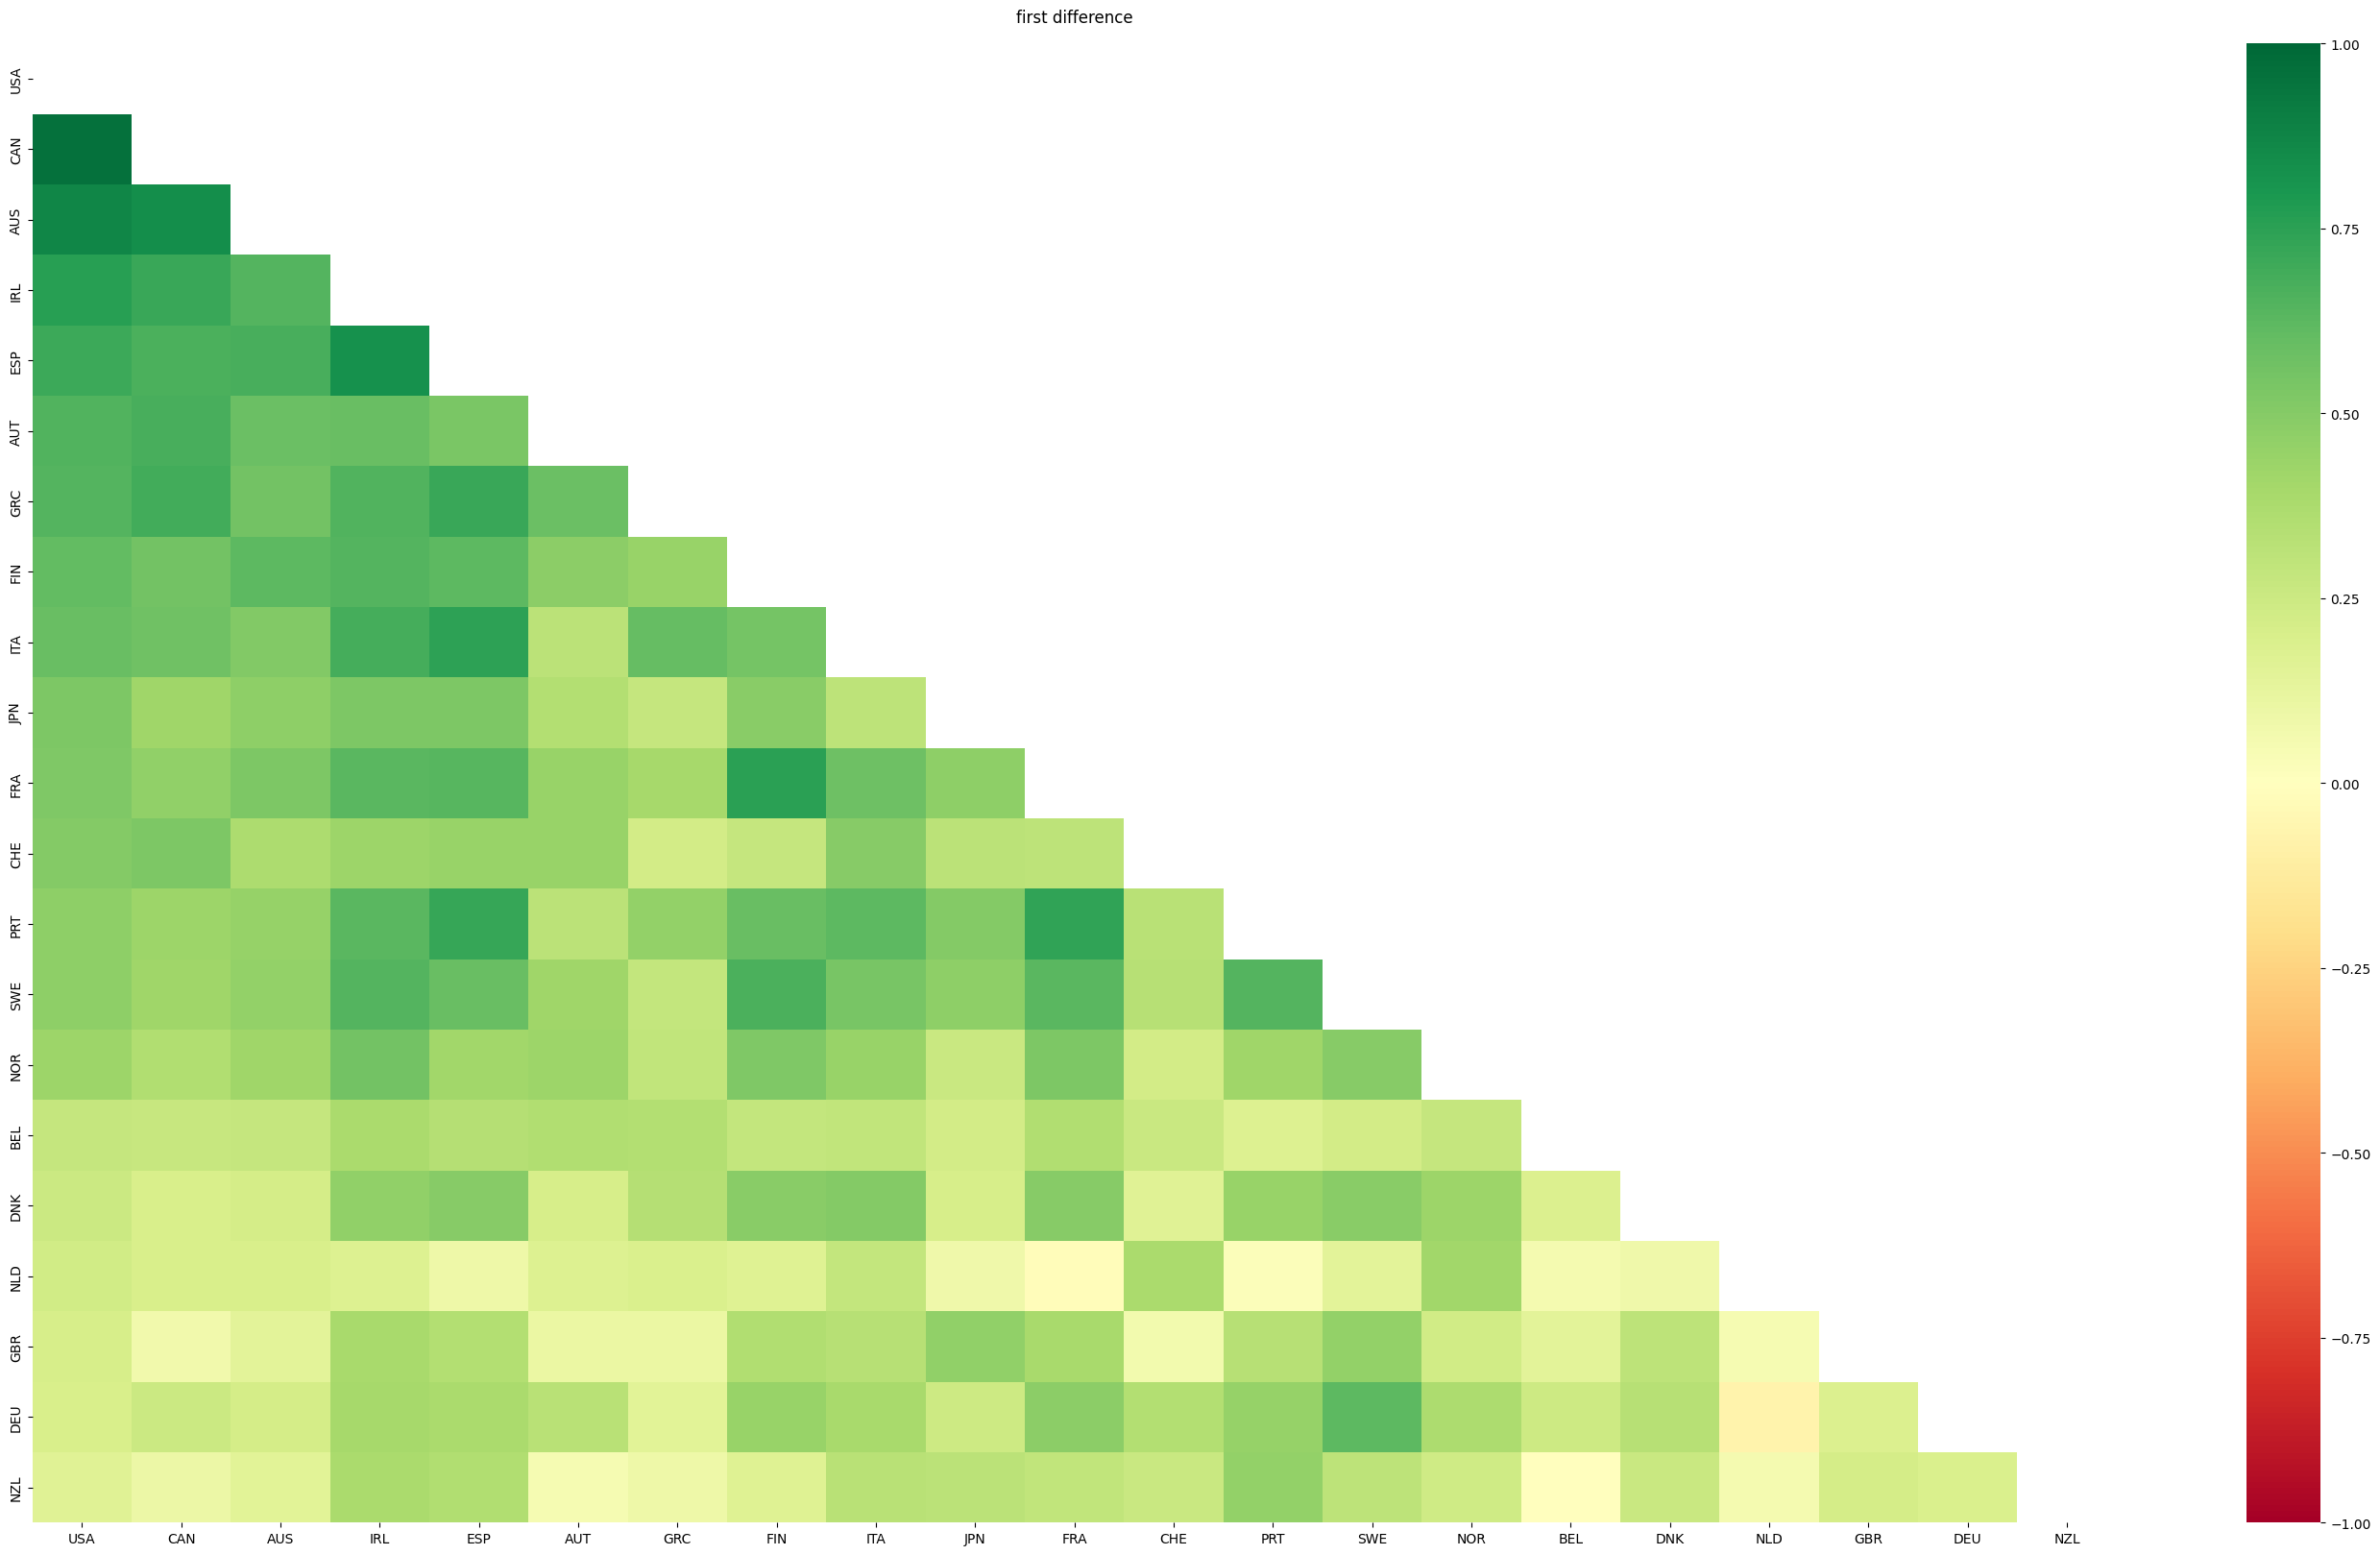

In [10]:
# show the heatmap visualisation

oecdemploymentheatmap = oecdemploymentdetrend.get_heatmap()

In [11]:
# show the reshaped version: 

oecdemploymentreshaped = oecdemploymentdetrend.get_organized()

oecdemploymentreshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,NLD,DEU,-0.073146
377,NLD,NZL,0.061160
397,GBR,DEU,0.186084
398,GBR,NZL,0.214021
419,DEU,NZL,0.191793


## IMF data: industrial production index, linear detrending

double check if i'm using the right data (should have a nice full series for all the countries?)

In [12]:
imfipidetrend = pc.Prepare_Correlations(imfipi, detrending="linear detrending", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

imfipidetrend.data.tail()

,AUT,AUS,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,GBR,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.027147,-0.004551,-0.025394,0.012318,-0.020333,-0.053564,0.018416,0.062526,0.000405,0.009945,0.125400,0.085380,0.238299,0.038333,-0.045025,-0.040450,0.038247,0.009412,0.059891,0.039099,-0.037263
2021-01-01,-0.014325,-0.053862,0.014144,0.021887,0.017126,-0.059146,0.062995,0.070603,0.013615,0.009821,0.125317,0.139344,0.307168,0.062543,-0.016733,-0.025389,0.072962,0.013371,0.053977,0.055399,-0.030721
2021-04-01,-0.004985,-0.057197,0.099221,0.015283,0.039161,-0.067846,0.059700,0.060519,0.018933,0.007997,0.127677,0.161741,0.255422,0.071672,-0.015054,-0.011545,0.079603,0.033684,0.023516,0.063547,-0.016220
2021-07-01,0.012006,-0.062273,0.084984,0.028318,0.031478,-0.098038,0.108732,0.060141,0.038887,0.008883,0.123620,0.180146,0.303085,0.085860,-0.033930,-0.004306,0.110702,-0.035773,0.023706,0.059056,-0.008840
2021-10-01,0.049633,-0.068893,0.057765,0.042329,0.025140,-0.075606,0.148337,0.094714,0.070345,0.010109,0.110280,0.215080,0.278517,0.098044,-0.025227,-0.001597,0.084794,0.007659,0.055126,0.075011,0.001608


In [13]:
# show the correlation matrix

imfipimatrix = imfipidetrend.get_correlationmatrix()

imfipimatrix

,USA,JPN,DEU,FRA,AUT,ITA,SWE,ESP,NZL,PRT,CAN,FIN,AUS,DNK,NLD,BEL,CHE,GBR,GRC,IRL,NOR
USA,1.000000,0.841215,0.799439,0.767916,0.715297,0.596314,0.558480,0.531214,0.523404,0.462413,0.444726,0.444453,0.438057,0.432231,0.426010,0.398418,0.361861,0.195465,0.145265,0.034092,-0.016829
JPN,0.841215,1.000000,0.801586,0.791607,0.793503,0.709933,0.718626,0.676468,0.687526,0.526182,0.296583,0.670007,0.641060,0.434336,0.578133,0.587309,0.425711,0.264084,0.305952,0.072553,0.025367
DEU,0.799439,0.801586,1.000000,0.682053,0.791053,0.479366,0.448587,0.351775,0.387898,0.279313,0.140142,0.448444,0.732564,0.090545,0.659523,0.549689,0.461807,-0.144580,-0.122433,-0.224028,-0.333578
FRA,0.767916,0.791607,0.682053,1.000000,0.779829,0.909215,0.808842,0.836602,0.689206,0.815087,0.574044,0.614348,0.442686,0.675166,0.365713,0.472498,0.321688,0.523626,0.488652,0.322146,0.231522
AUT,0.715297,0.793503,0.791053,0.779829,1.000000,0.742333,0.787822,0.669023,0.553177,0.464735,0.095609,0.803033,0.776992,0.417206,0.704748,0.806658,0.616990,0.236483,0.358448,-0.000137,0.015488
ITA,0.596314,0.709933,0.479366,0.909215,0.742333,1.000000,0.897600,0.923013,0.672175,0.852652,0.508371,0.729241,0.364078,0.783362,0.280573,0.535106,0.403078,0.702308,0.730981,0.486391,0.446874
SWE,0.558480,0.718626,0.448587,0.808842,0.787822,0.897600,1.000000,0.889111,0.662563,0.706480,0.336719,0.877895,0.513136,0.761218,0.393149,0.651454,0.436841,0.627520,0.731296,0.365902,0.387430
ESP,0.531214,0.676468,0.351775,0.836602,0.669023,0.923013,0.889111,1.000000,0.772422,0.884549,0.446087,0.748741,0.330745,0.815772,0.209771,0.455076,0.274030,0.802011,0.826181,0.561872,0.539221
NZL,0.523404,0.687526,0.387898,0.689206,0.553177,0.672175,0.662563,0.772422,1.000000,0.653816,0.341035,0.548475,0.369952,0.514573,0.394509,0.383461,0.074858,0.546034,0.525997,0.315146,0.292941
PRT,0.462413,0.526182,0.279313,0.815087,0.464735,0.852652,0.706480,0.884549,0.653816,1.000000,0.605532,0.459202,0.094201,0.788741,-0.028392,0.178890,0.076628,0.782761,0.702247,0.594617,0.550058


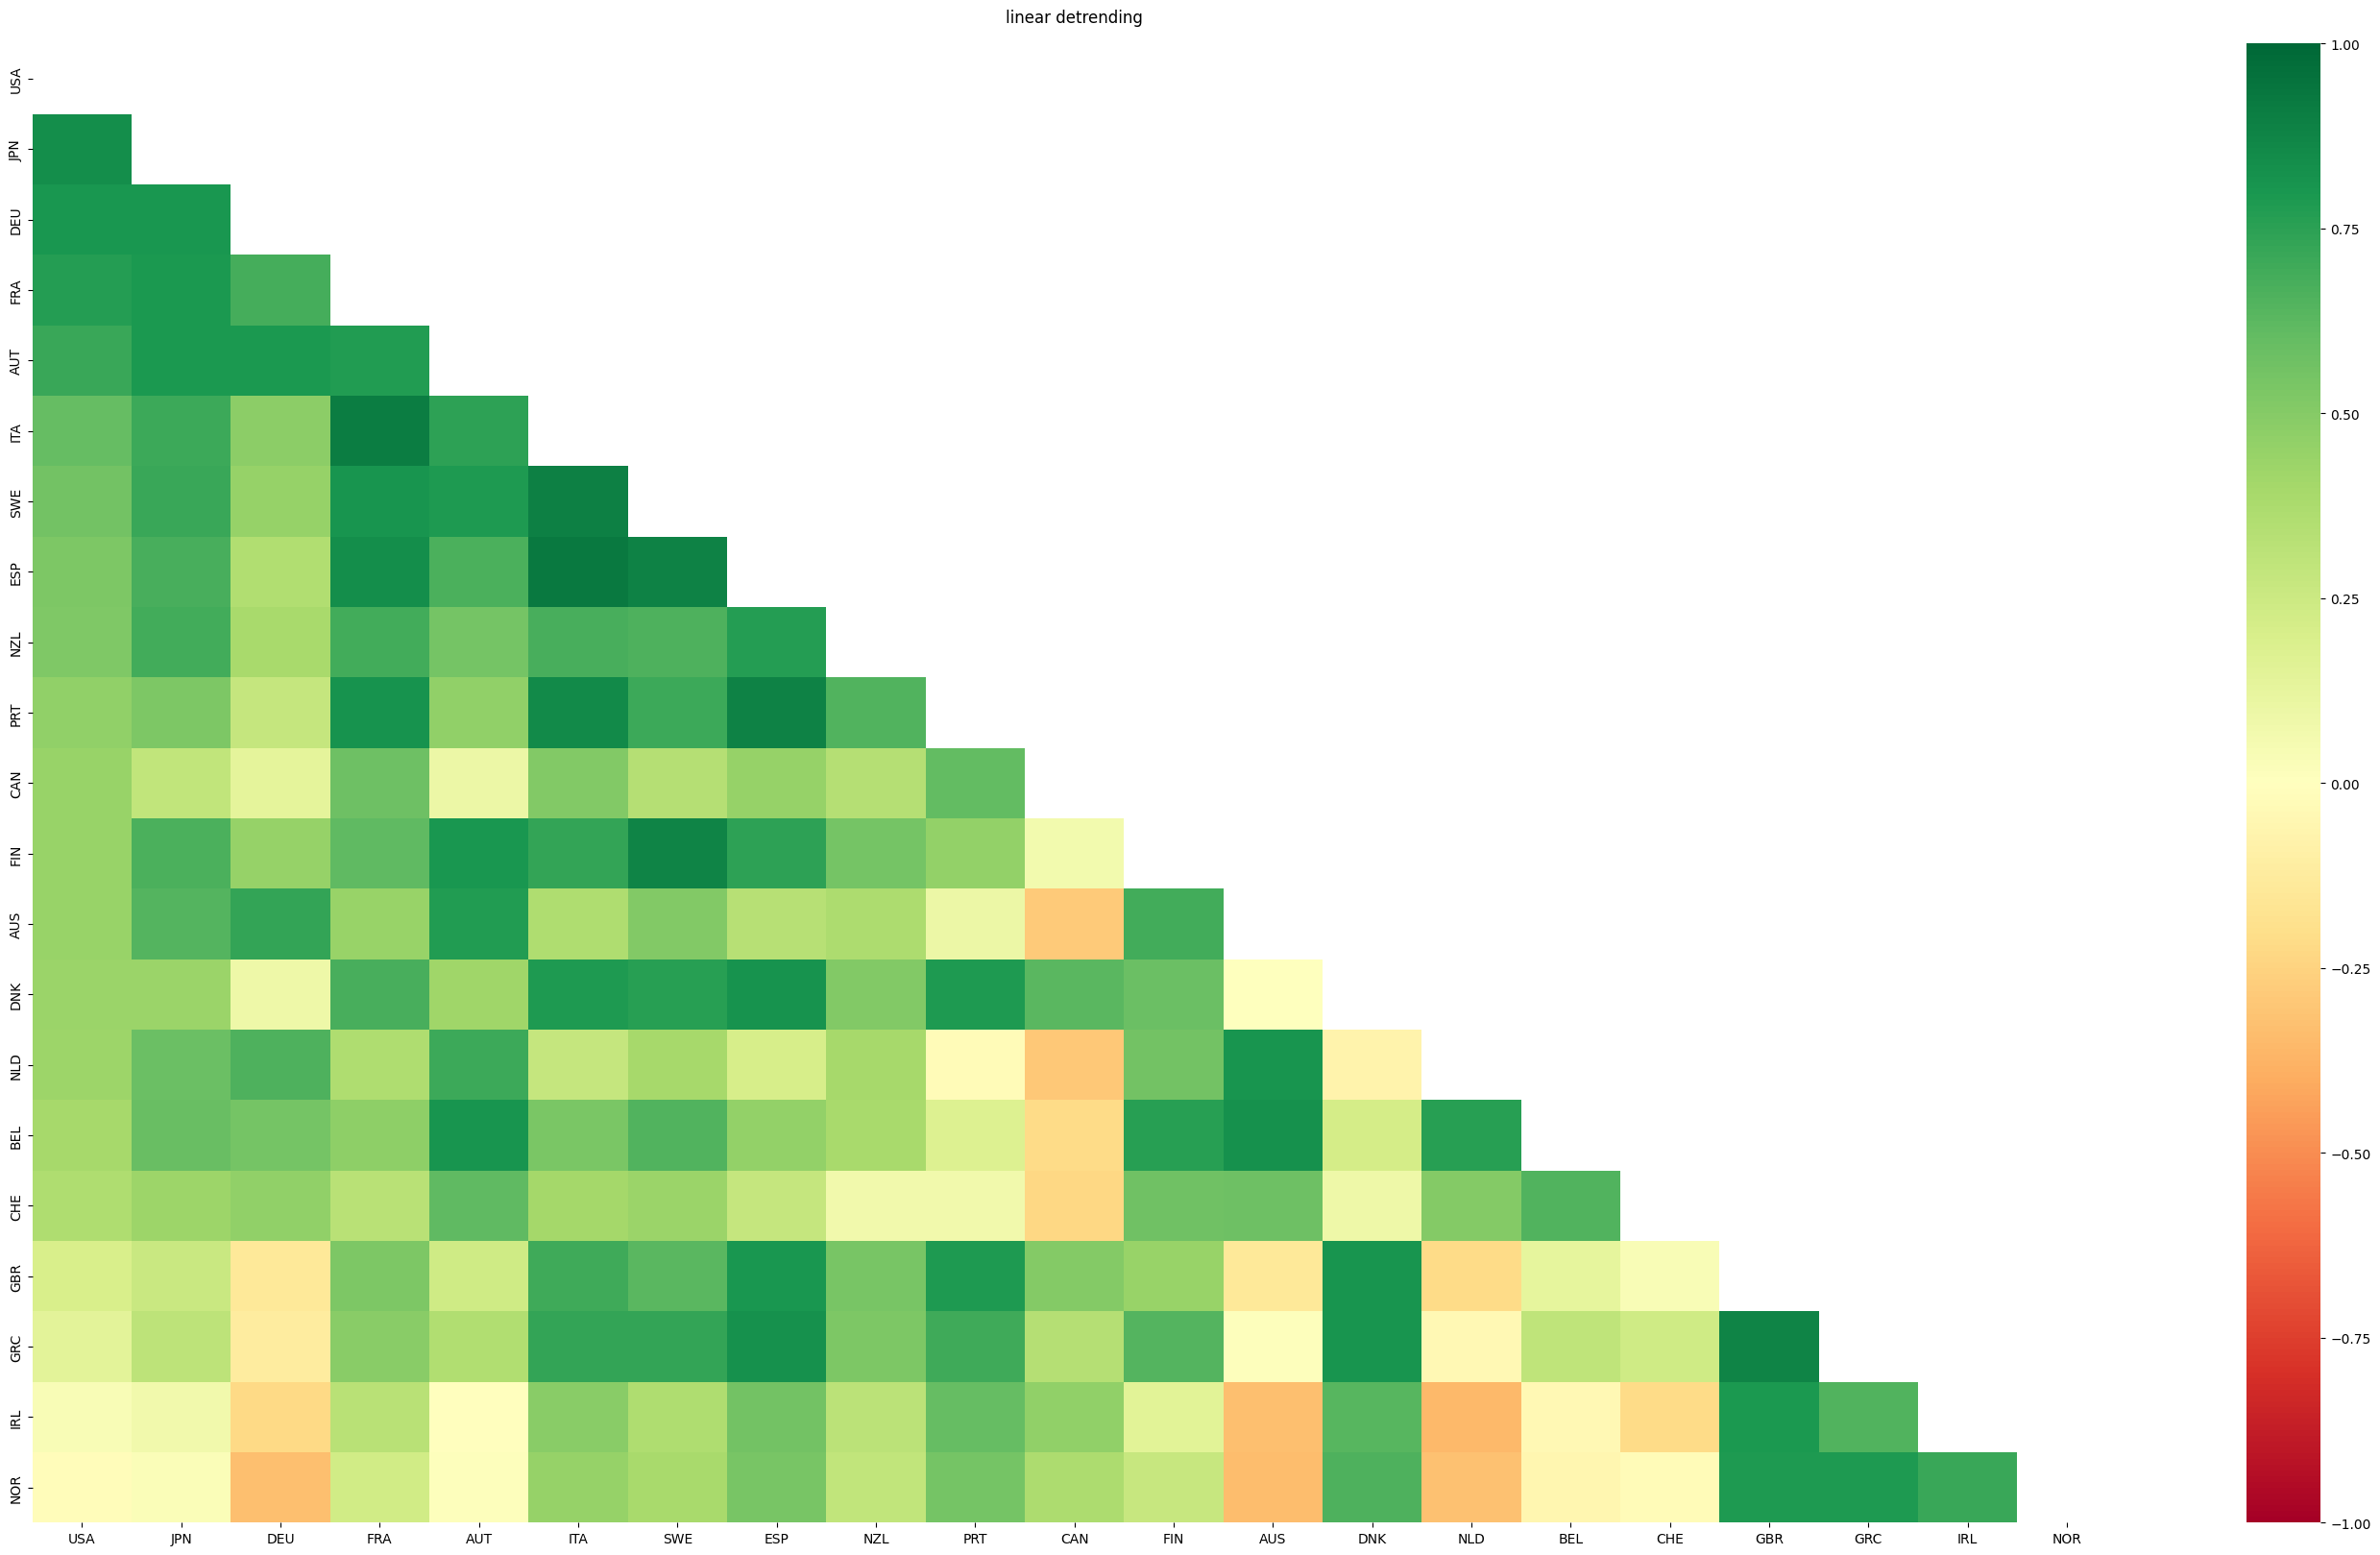

In [14]:
# show the heatmap visualisation

imfipiheatmap = imfipidetrend.get_heatmap()

In [15]:
# show the reshaped version: 

imfipireshaped = imfipidetrend.get_organized()

imfipireshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,GBR,IRL,0.792504
377,GBR,NOR,0.784399
397,GRC,IRL,0.654682
398,GRC,NOR,0.786589
419,IRL,NOR,0.718233


# look at some missing values that can cause issues with scipy linear detrending

In [16]:
lookatnansimf = imfipi[list(set(imfipi.columns) & set(frankelrosecountries))]
lookatnansimf = lookatnansimf.loc[(lookatnansimf.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansimf.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansimf[lookatnansimf.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_14256\2327253042.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansimf[lookatnansimf.isna().any(1)]


,AUS,PRT,IRL,GBR,AUT,NZL,CAN,BEL,NOR,ITA,JPN,FRA,DEU,CHE,NLD,USA,DNK,ESP,GRC,FIN,SWE
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,67.916615,111.762827,51.734178,97.868837,66.118755,85.362776,101.039949,71.282397,117.238018,114.427091,100.808097,100.424965,84.826325,73.800515,81.914914,92.451261,102.236210,108.585343,NaN,82.654978,90.301261
1998-04-01,68.744976,113.532586,51.828354,96.954175,67.042201,84.820189,101.570927,71.778059,117.238018,114.767280,97.774200,101.791517,84.972578,73.564419,82.751631,93.067178,101.981494,109.496505,NaN,83.938635,91.533469
1998-07-01,68.322775,113.002572,55.438445,94.978505,68.076461,84.807571,102.336458,71.426965,114.508530,113.901345,96.567537,101.291559,85.228519,73.756977,82.871639,93.757430,111.037223,109.465085,NaN,83.406387,93.428913
1998-10-01,68.571471,113.276717,55.877935,95.417543,68.002586,83.722397,103.964121,70.872788,114.768481,112.602443,95.912491,101.924840,83.912249,72.846849,82.871639,95.116695,96.263688,110.784699,NaN,83.187226,92.930643
1999-01-01,69.556634,115.372403,59.017145,99.259124,68.187275,85.526814,105.631622,70.439083,113.631194,112.571517,97.326011,101.724856,84.277879,73.370437,84.125047,95.806203,103.502188,110.470505,NaN,84.721353,93.065311
1999-04-01,68.320594,116.679161,58.420695,99.661575,70.440484,84.302839,106.908397,71.124061,112.461413,111.829287,97.291535,103.224731,85.082267,74.686600,84.211719,96.733441,100.206085,111.161731,NaN,86.192862,93.361579
1999-07-01,68.908120,115.905463,63.223686,101.820177,71.326992,86.410095,108.687344,72.469921,115.418359,114.210608,98.705055,104.224648,86.142596,76.711255,85.411791,97.599973,100.244102,113.109732,NaN,86.067627,93.795882
1999-10-01,69.324403,117.644761,65.986190,102.588494,75.353218,88.656151,110.607653,73.981002,116.295695,115.942477,100.049622,106.557787,87.202925,79.397507,86.518524,99.324434,108.463450,114.837798,NaN,88.415780,95.492692


In [17]:
lookatnansoecd = oecdemployment[list(set(oecdemployment.columns) & set(frankelrosecountries))]
lookatnansoecd = lookatnansoecd.loc[(lookatnansoecd.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd[lookatnansoecd.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_14256\1990012608.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd[lookatnansoecd.isna().any(1)]


,AUS,PRT,IRL,GBR,AUT,NZL,CAN,BEL,NOR,ITA,JPN,FRA,DEU,CHE,NLD,USA,DNK,ESP,GRC,FIN,SWE
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,67.52501,66.53934,NaN,71.27648,NaN,69.64523,68.53333,NaN,NaN,51.63791,69.92259,NaN,NaN,NaN,NaN,73.76123,NaN,NaN,55.60656,63.94550,NaN
1998-04-01,67.72712,66.93438,NaN,71.27740,NaN,69.02686,68.73333,NaN,NaN,51.87399,69.59286,NaN,NaN,78.04481,NaN,73.85174,NaN,NaN,55.85064,62.68186,NaN
1998-07-01,67.87543,66.79893,NaN,71.56174,NaN,68.99280,69.06667,NaN,NaN,52.07743,69.45416,NaN,NaN,NaN,NaN,73.81988,NaN,NaN,56.13288,64.54234,NaN
1998-10-01,68.03833,67.12978,NaN,71.78155,NaN,68.63832,69.36667,NaN,NaN,52.19458,69.27718,NaN,NaN,NaN,NaN,73.94733,NaN,NaN,56.21347,64.99767,NaN
1999-01-01,67.99295,67.34690,NaN,71.85828,68.66560,69.25211,69.63333,59.19458,NaN,52.42956,69.08689,NaN,NaN,NaN,NaN,73.98900,76.23036,52.92431,56.34367,65.71420,NaN
1999-04-01,68.06286,67.31715,63.08013,71.88622,68.58568,69.20969,69.86667,59.02541,NaN,52.60624,68.98834,NaN,NaN,78.42708,NaN,73.89811,76.28310,53.55390,55.80833,66.69583,NaN
1999-07-01,68.26156,67.60715,63.77315,72.11771,68.56554,69.55880,70.13333,59.54280,NaN,52.79292,69.01920,NaN,NaN,NaN,NaN,73.86941,76.19152,54.12680,55.70330,66.33366,NaN
1999-10-01,68.55666,67.77253,64.18932,72.27470,68.35089,70.19769,70.50000,59.48914,NaN,52.94587,68.99085,NaN,NaN,NaN,NaN,74.02948,75.45797,54.76043,55.74428,66.36963,NaN
2000-01-01,68.51775,68.13086,64.62188,72.26537,68.46355,70.00667,70.86667,60.07680,77.42034,53.01252,68.75898,NaN,NaN,NaN,71.81953,74.26450,76.23196,55.46640,55.97697,66.33025,NaN


# regressions demo: working with shares data

In [18]:
tmp = pd.read_pickle(cleandatapath+'PortfolioData_OurData_NScode.pkl')

In [19]:
tmp[tmp['iso3'] == 'BEL']

,iso3,Date,spot,fwd1,cpi,cpius,lagfwd,logrx,forwardspread,logcpi,yoycpi,inflationexpectation,logcpius,yoycpius,inflationexpectationus,realfwdspread,nextrx,year,cent_exp,cent_equal,gdpshare,import_Cons,export_GDP,gdp,imps,exps,tradetogdp,expshare,impshare,consrs_pwt
51454,BEL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,NaN,NaN,0.009632,0.629267,0.449563,NaN,NaN,NaN,NaN,NaN,NaN,0.028204
51455,BEL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971,NaN,NaN,0.009713,0.602748,0.437675,NaN,NaN,NaN,NaN,NaN,NaN,0.040797
51456,BEL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,NaN,NaN,0.010513,0.588097,0.441373,NaN,NaN,NaN,NaN,NaN,NaN,0.004403
51457,BEL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1973,NaN,NaN,0.011059,0.653916,0.480319,NaN,NaN,NaN,NaN,NaN,NaN,0.174301
51458,BEL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974,NaN,NaN,0.011265,0.745467,0.528934,NaN,NaN,NaN,NaN,NaN,NaN,0.145252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,BEL,2022-11-30,NaN,NaN,127.92,298.598,NaN,NaN,NaN,4.851405,0.101010,0.009643,5.699098,0.068923,0.006230,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4343,BEL,2022-12-31,NaN,NaN,127.72,298.990,NaN,NaN,NaN,4.849840,0.098494,0.008417,5.700410,0.062458,0.005744,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4344,BEL,2023-01-31,NaN,NaN,127.84,300.536,NaN,NaN,NaN,4.850779,0.077387,0.008208,5.705568,0.061539,0.005205,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4345,BEL,2023-02-28,NaN,NaN,126.95,301.648,NaN,NaN,NaN,4.843793,0.064082,0.006449,5.709261,0.058141,0.005128,NaN,NaN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pd.read_pickle(cleandatapath+'cons_ngdp_cent_for_regression.pkl')

,year,worldtotcons,iso3,totcons,gdpshare,cent_exp
10199,1970,NaN,ABW,NaN,NaN,NaN
10200,1971,NaN,ABW,NaN,NaN,NaN
10201,1972,NaN,ABW,NaN,NaN,NaN
10202,1973,NaN,ABW,NaN,NaN,NaN
10203,1974,NaN,ABW,NaN,NaN,NaN
...,...,...,...,...,...,...
14223,2017,NaN,ZWE,NaN,0.000218,0.000104
14224,2018,NaN,ZWE,NaN,0.000399,0.000109
14225,2019,NaN,ZWE,NaN,0.000252,NaN
14226,2020,NaN,ZWE,NaN,0.000256,NaN


In [21]:
# import the shares data (original version)
shares_original = pd.read_pickle(cleandatapath+'FullData_OriginalData_plusExports.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (alternative version) THIS IS THE ONE WE'RE USING
shares_alt = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_TSimportShares_Taiwan.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (edited version of original)
shares_altoriginal = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_CorrectedOriginalVersion.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# organize shares data
dataversions = [shares_original, shares_alt, shares_altoriginal]
dataversions_names = ['original', 'alt', 'altoriginal']
sharesdata_dict = dict.fromkeys(dataversions_names)

# put the 3 versions of the data in their own dictionary entries
for i, version in enumerate(dataversions):
    # taking the same year range as the correlation data and only using one obs per year since it is annual data
    # only consider countries that we calculated correlation coefficients for
    version = version[(version['iso3'].isin(original_countries_iso3)) & ((version['year'] >= 1990) & (version['year'] <= 2021))].groupby(['iso3', 'year']).first().reset_index()
    # getting the averages
    version = version[['iso3', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']].groupby(['iso3'], as_index=False).mean()
    version = version.dropna()
    version.name = dataversions_names[i]
    # print(version)
    
    sharesdata_dict[version.name] = version

# import consumption, centrality and nominal gdp shares
cons_ngdp_cent = pd.read_pickle(cleandatapath+'cons_ngdp_cent_for_regression.pkl')
# taking the same year range as the correlation data
# only consider countries that we calculated correlation coefficients for
cons_ngdp_cent = cons_ngdp_cent[(cons_ngdp_cent['iso3'].isin(original_countries_iso3)) & ((cons_ngdp_cent['year'] >= 1990) & (cons_ngdp_cent['year'] <= 2021))]

worldcons = cons_ngdp_cent[['year', 'iso3', 'worldtotcons', 'totcons']]
cent = cons_ngdp_cent[['year', 'iso3', 'cent_exp']]
ngdpshares = cons_ngdp_cent[['year', 'iso3', 'gdpshare']]

# import gravity model data from CEPII
cepii_data = pd.read_stata(gravitydatapath + 'Gravity_filtered.dta')
cepii_data.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)

# import bti
bti = pd.read_pickle(cleandatapath+'bti_for_regression.pkl')
# find average across years for each pair
bti = bti[['iso3_o', 'iso3_d', 'bti']].groupby(['iso3_o', 'iso3_d'], as_index=False).mean()

In [22]:
# get data for each calculation method:
correlations_covariates_original = {}
correlations_covariates_alt = {}
correlations_covariates_altoriginal = {}

for method in dataversions_names:
    for data in correlationdata_dict:
        merged = reg.prepare_shares(correlation_data=correlationdata_dict[data], shares_data=sharesdata_dict, version=method)

        # make columns
        merged['prod_worldconscorr'] = np.nan
        merged['prod_ngdpshare'] = np.nan
        merged['prod_cent'] = np.nan

        # calculate covariates for each row (which already has each unique country pair)
        for index, row in merged.iterrows():
            countryA = row['iso3_firstcountry']
            countryB = row['iso3_secondcountry']

            worldcorr_countryA = worldcons[worldcons['iso3'] == countryA][['totcons', 'worldtotcons']].corr()['totcons'][-1]
            worldcorr_countryB = worldcons[worldcons['iso3'] == countryB][['totcons', 'worldtotcons']].corr()['totcons'][-1]
            ngdpshare_countryA = ngdpshares[ngdpshares['iso3'] == countryA]['gdpshare'].mean()
            ngdpshare_countryB = ngdpshares[ngdpshares['iso3'] == countryB]['gdpshare'].mean()
            cent_countryA = cent[cent['iso3'] == countryA]['cent_exp'].mean()
            cent_countryB = cent[cent['iso3'] == countryB]['cent_exp'].mean()

            merged.at[index, 'prod_worldconscorr'] = worldcorr_countryA*worldcorr_countryB
            merged.at[index, 'prod_ngdpshare'] = ngdpshare_countryA*ngdpshare_countryB
            merged.at[index, 'prod_cent'] = cent_countryA*cent_countryB
            
        # merge bti with correlation data
        bti.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)
        merged = pd.merge(left=merged, right=bti, on=['iso3_firstcountry', 'iso3_secondcountry'], how='left')
        
        # add CEPII to our data
        merged = pd.merge(left=merged, right=cepii_data, how='left', on=['iso3_firstcountry', 'iso3_secondcountry'])
        
        if method == 'alt':
            correlations_covariates_alt[data] = merged
            correlations_covariates_alt[data].name = data + ', ' + method + ' shares calculation'
        elif method == 'original':
            correlations_covariates_original[data] = merged
            correlations_covariates_original[data].name = data + ', ' + method + ' shares calculation'
        elif method == 'altoriginal':
            correlations_covariates_altoriginal[data] = merged
            correlations_covariates_altoriginal[data].name = data + ', ' + method + ' shares calculation'

In [25]:
# three different detrending methods: hp, quadratic, fourth difference
# 2sls regressions and ols (ols vs iv)
# table 1: consumption on constant and prod_import
# table 2: output on constant and prod_export
# one table for each of consumption and output pd.DataFrame(columns=['detrending technique', 'OLS, 'IV'])
# brackets SE, star coefficients

# run IV and OLS regressions (basic specification)

# dataframe to hold results:
gdp_results = pd.DataFrame(columns=['Activity','IV-estimated coefficient','OLS-estimated coefficient'])
gdp_results.name = "Real GDP Correlations"
cons_results = gdp_results.copy()
cons_results.name = "Real Consumption Correlations"

for i, activity in enumerate(list(correlations_covariates_alt.keys())):
    if activity.startswith("Real GDP"):
        result_iv = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='IV', dependent_var=['correlation'], endog_vars=['prod_export'], instrument_vars=['logdist', 'contig', 'comlang_off'])
        result_ols = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='OLS', dependent_var=['correlation'], independent_vars=['prod_export'])
    elif activity.startswith("Real Consumption"):
        result_iv = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='IV', dependent_var=['correlation'], endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'])
        result_ols = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='OLS', dependent_var=['correlation'], independent_vars=['prod_import'])
    
    beta_iv = round(result_iv.params[1],2)
    se_iv = round(result_iv.std_errors[1],2)
    p_iv = result_iv.pvalues[1]
    if p_iv < 0.1:
        beta_iv = str(beta_iv) + '*'
    if p_iv < 0.05:
        beta_iv = str(beta_iv) + '*'
    if p_iv < 0.01:
        beta_iv = str(beta_iv) + '*'
    
    display_iv = '(' + str(se_iv) + ')'

    beta_ols = round(result_ols.params[1],2)
    se_ols = round(result_ols.bse[1],2)
    p_ols = result_ols.pvalues[1]
    if p_ols < 0.1:
        beta_ols = str(beta_ols) + '*'
    if p_ols < 0.05:
        beta_ols = str(beta_ols) + '*'
    if p_ols < 0.01:
        beta_ols = str(beta_ols) + '*'

    display_ols = '(' + str(se_ols) + ')'

    if activity.startswith("Real GDP"):
        gdp_results.loc[i] = [activity, beta_iv + '\n' + display_iv, beta_ols + '\n' + display_ols]
    elif activity.startswith("Real Consumption"):
        cons_results.loc[i] = [activity, beta_iv + '\n' + display_iv, beta_ols + '\n' + display_ols]

In [26]:
# create a display version (with standard errors properly displayed)
gdp_results_disp = reg.pretty_print(gdp_results)
cons_results_disp = reg.pretty_print(cons_results)

In [27]:
display(gdp_results_disp)
display(cons_results_disp)

,Activity,IV-estimated coefficient,OLS-estimated coefficient
0,"Real GDP, fourth difference",0.42***(0.05),0.24***(0.03)
1,"Real GDP, HP Filter",0.49***(0.05),0.24***(0.03)
2,"Real GDP, quadratic detrending",0.92***(0.08),0.54***(0.05)


,Activity,IV-estimated coefficient,OLS-estimated coefficient
3,"Real Consumption, fourth difference",0.53***(0.05),0.31***(0.03)
4,"Real Consumption, HP Filter",0.64***(0.06),0.37***(0.03)
5,"Real Consumption, quadratic detrending",0.72***(0.09),0.48***(0.06)


# regressions demo: working with frankel and rose data

In [28]:
# import the frankel and rose data (the original data is in a stata dataset)
instruments = pd.read_stata(ocadatapath + 'DATAV4.dta')
instruments.name = 'Normalized by total trade'

# Load dataframe with IMF country code in 'IMF' column and iso3 country code in 'iso3' column
country_code_mapping = pd.read_csv(rawdatapath+'Country_iso_codes.csv')
country_code_mapping = country_code_mapping[['iso3','IMF']]

# Make a dictionary out of the dataframe
dict = country_code_mapping.set_index('IMF').to_dict()['iso3']

# Replace IMF country codes in CountryCode and PartnerCode columns
# by corresponding ISO3 country codes
instruments['count1']= instruments['count1'].map(dict)
instruments['count2']= instruments['count2'].map(dict)

# log distance
instruments['distance'] = np.log(instruments['distance'])

# log trade intensity
instruments['wt'] = np.log(instruments['wt'])

# complete batch of correlations used in paper
versions = ['dy', 'di', 'de', 'du', 'ty', 'ti', 'te', 'tu', 'hy', 'hi', 'he', 'hu', 'sy', 'si', 'se', 'su', 'oy', 'oi', 'oe', 'ou']

# variable descriptions from stata
stata_descriptions = ["Bilateral Output Correlation, Differenced Data", "Bilateral IP Correlation, Differenced Data", "Bilateral Empl'y Correlation, Differenced Data", 
 "Bilateral Unem't Correlation, Differenced Data", "Bilateral Output Correlation, De-Trended Data", "Bilateral IP Correlation, De-Trended Data", 
 "Bilateral Empl'y Correlation, De-Trended Data", "Bilateral Unem't Correlation, De-Trended Data", "Bilateral Output Correlation, HP-Filtered Data", 
 "Bilateral IP Correlation, HP-Filtered Data", "Bilateral Empl'y Correlation, HP-Filtered Data", "Bilateral Unem't Correlation, HP-Filtered Data", 
 "Bilateral Output Correlation, HP-SA Data", "Bilateral IP Correlation, HP-SA Data", "Bilateral Empl'y Correlation, HP-SA Data", 
 "Bilateral Unem't Correlation, HP-SA Data", "Bilateral Output Correlation, Oil De-Trended Data", "Bilateral IP Correlation, Oil De-Trended Data", 
 "Bilateral Empl'y Correlation, Oil De-Trended Data", "Bilateral Unem't Correlation, Oil De-Trended Data"]

# multiply correlation coefficients by 100
for i, version in enumerate(versions):
    instruments[version] = instruments[version]*100

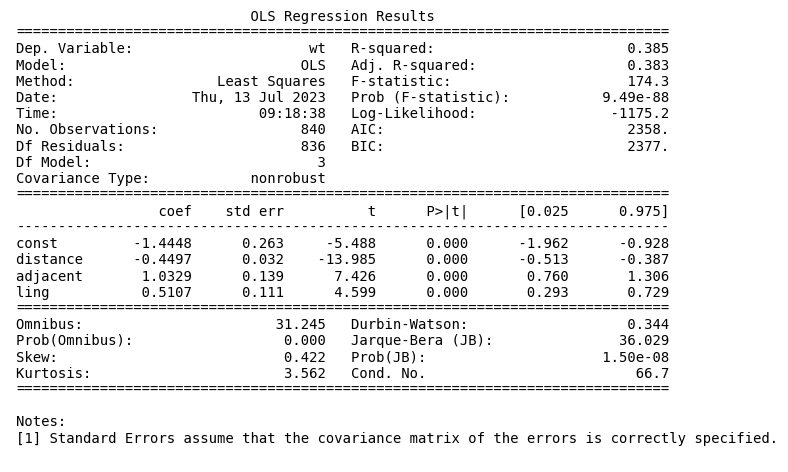

In [29]:
# look at the first stage results
y = instruments[['wt']]
X = instruments[['distance', 'adjacent', 'ling']]
X = sm.add_constant(X)
firststagemodel = sm.OLS(y,X)
firststageresults = firststagemodel.fit()

plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(firststageresults.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()

In [30]:
# run IV regressions

# dataframe to hold results:
iv_results_2sls = pd.DataFrame(columns=['Type of correlation', 'Description', 'Estimated slope coefficient (normalized by total trade)','Standard error'])
iv_results_2sls.name = "2SLS"
iv_results_ml = iv_results_2sls.copy()
iv_results_ml.name = "ML"
iv_results_gmm = iv_results_2sls.copy()
iv_results_gmm.name = "GMM"

for i, version in enumerate(versions):
    for table in [iv_results_2sls, iv_results_ml, iv_results_gmm]:
        result = reg.Regressions(instruments).run_regression(method='IV', dependent_var=[version], endog_vars=['wt'], instrument_vars=['distance', 'adjacent', 'ling'], iv_type=table.name)
        beta = result.params[1]
        se = result.std_errors[1]
        description = stata_descriptions[i]

        table.loc[i] = [version, description, beta, se]

In [31]:
# show the table of coefficients of iv results (2sls)
iv_results_2sls[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",10.314427,1.392068
1,di,"Bilateral IP Correlation, Differenced Data",10.141986,1.465044
2,de,"Bilateral Empl'y Correlation, Differenced Data",8.628224,1.804666
3,du,"Bilateral Unem't Correlation, Differenced Data",7.791396,1.516854
4,ty,"Bilateral Output Correlation, De-Trended Data",11.318741,1.720126
5,ti,"Bilateral IP Correlation, De-Trended Data",9.336487,2.071980
6,te,"Bilateral Empl'y Correlation, De-Trended Data",8.625642,2.422716
7,tu,"Bilateral Unem't Correlation, De-Trended Data",10.839718,2.175144
8,hy,"Bilateral Output Correlation, HP-Filtered Data",8.603436,1.420853
9,hi,"Bilateral IP Correlation, HP-Filtered Data",9.764923,1.492478


In [32]:
# show the table of coefficients of iv results (mle)
iv_results_ml[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",10.339727,1.398750
1,di,"Bilateral IP Correlation, Differenced Data",10.145964,1.466169
2,de,"Bilateral Empl'y Correlation, Differenced Data",8.730872,1.842768
3,du,"Bilateral Unem't Correlation, Differenced Data",7.915863,1.542577
4,ty,"Bilateral Output Correlation, De-Trended Data",11.319086,1.720214
5,ti,"Bilateral IP Correlation, De-Trended Data",9.350102,2.088663
6,te,"Bilateral Empl'y Correlation, De-Trended Data",8.700687,2.468557
7,tu,"Bilateral Unem't Correlation, De-Trended Data",10.854640,2.180284
8,hy,"Bilateral Output Correlation, HP-Filtered Data",8.639093,1.431386
9,hi,"Bilateral IP Correlation, HP-Filtered Data",9.858536,1.513282


In [33]:
# show the table of coefficients of iv results (gmm)
iv_results_gmm[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",10.235604,1.390421
1,di,"Bilateral IP Correlation, Differenced Data",10.289274,1.424074
2,de,"Bilateral Empl'y Correlation, Differenced Data",8.270030,1.802229
3,du,"Bilateral Unem't Correlation, Differenced Data",8.487269,1.493727
4,ty,"Bilateral Output Correlation, De-Trended Data",11.340234,1.705244
5,ti,"Bilateral IP Correlation, De-Trended Data",9.084380,2.059606
6,te,"Bilateral Empl'y Correlation, De-Trended Data",8.240802,2.416572
7,tu,"Bilateral Unem't Correlation, De-Trended Data",10.399746,2.133704
8,hy,"Bilateral Output Correlation, HP-Filtered Data",8.524010,1.419694
9,hi,"Bilateral IP Correlation, HP-Filtered Data",10.260601,1.457049


In [34]:
# look at a regular OLS regression of correlations on wt
ols_results = pd.DataFrame(columns=['Type of correlation', 'Description', 'OLS estimated slope coefficient (normalized by total trade)','Standard error'])

for i, version in enumerate(versions):
    result = reg.Regressions(instruments).run_regression(method='OLS', dependent_var=[version], independent_vars=['wt'])
    beta = result.params[1]
    se = result.bse[1]
    description = stata_descriptions[i]

    ols_results.loc[i] = [version, description, beta, se]

In [35]:
ols_results[:16]

,Type of correlation,Description,OLS estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",7.126096,0.898047
1,di,"Bilateral IP Correlation, Differenced Data",6.851032,0.910027
2,de,"Bilateral Empl'y Correlation, Differenced Data",5.685214,1.142563
3,du,"Bilateral Unem't Correlation, Differenced Data",3.335948,1.003849
4,ty,"Bilateral Output Correlation, De-Trended Data",7.192820,1.167049
5,ti,"Bilateral IP Correlation, De-Trended Data",8.261980,1.247854
6,te,"Bilateral Empl'y Correlation, De-Trended Data",6.227779,1.542629
7,tu,"Bilateral Unem't Correlation, De-Trended Data",6.989379,1.509046
8,hy,"Bilateral Output Correlation, HP-Filtered Data",5.661253,0.929744
9,hi,"Bilateral IP Correlation, HP-Filtered Data",5.576970,0.977643
